# **Lateral Boundary Diffusion idealized test cases**

This notebook shows results from idealized tests cases where only neutral diffusion and/or lateral diffusion are acting (i.e., dynamics and vertical diffusion are turned off). 

In [1]:
from mom6_tools.m6plot import ztplot
from mom6_tools.MOM6grid import MOM6grid
from IPython.display import display, Markdown, Latex
from mom6_tools.m6plot import xycompare, xyplot, setFigureSize, chooseColorLevels, \
                       createYZlabels, myStats, yzWeight, boundaryStats, label
from mom6_tools.m6toolbox import section2quadmesh
import xarray as xr
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import warnings
from misc import yzplot
warnings.filterwarnings("ignore")
%matplotlib inline

Basemap module not found. Some regional plots may not function properly


In [2]:
path = '/glade/scratch/gmarques/LBD/'
grd = MOM6grid(path+'LBD-Z/static.nc')

MOM6 grid successfully loaded... 



In [3]:
IC_Z = xr.open_dataset(path+'LBD-Z/MOM_IC.nc')
IC_H = xr.open_dataset(path+'LBD-H/MOM_IC.nc')

In [4]:
x1 = np.linspace(0,200,len(grd.xh))
lon = np.linspace(0,200,len(grd.xh)+1)

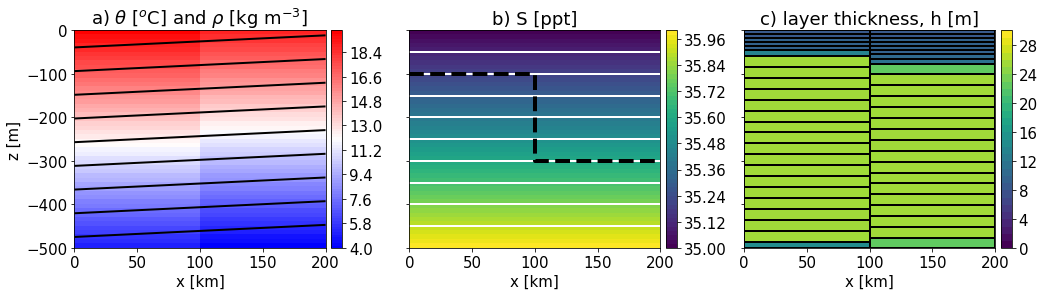

In [5]:
%matplotlib inline
plt.rcParams.update({'font.size': 15})
fig, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(17,4), sharey=True)
ax = ax1.flatten()
temp = np.ma.masked_invalid(IC_Z.Temp[0,:,0,:].values) 
salt = np.ma.masked_invalid(IC_Z.Salt[0,:,0,:].values) 
rho = -0.255*temp + 0.764*salt
#tr1 = np.ma.masked_invalid(IC_Z.tr1[0,:,0,:].values) 
#tr2 = np.ma.masked_invalid(IC_Z.tr2[0,:,0,:].values) 
eta = IC_Z.eta[0,:,0,:].values 
z1 = 0.5 * (eta[0:-1,1]+eta[1::,1]) 
z2 = 0.5 * (eta[0:-1,:]+eta[1::,:]) 

h_h = IC_H.h[0,:,0,:].values  
e_h = IC_H.eta[0,:,0,:].values  

[X1,Z1] = np.meshgrid(x1,z1)

# a
yzplot(temp, grd.geolon_c[0,:], eta, nbins=100, centerlabels=True, clim=(4., 20.0), 
       show_stats=0, axis=ax[0], colormap=plt.cm.bwr)
ax[0].set_ylabel('z [m]') 
ax[0].set_xlabel('x [km]') 
ax[0].set_title(r'a) $\theta$ [$^o$C] and $\rho$ [kg m$^{-3}$] ')
ax[0].contour(X1,z2,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=2)

#b
BLD = np.zeros(len(grd.geolon_c[0,:])+1)
BLD[0:2]= -100.; BLD[2::] = -300.
x_BLD = [grd.geolon_c[0,0], grd.geolon_c[0,1], grd.geolon_c[0,1], grd.geolon_c[0,2]]

yzplot(salt, grd.geolon_c[0,:], eta, nbins=50, colormap=plt.cm.viridis, centerlabels=True, 
       clim=(35., 36.), show_stats=0, axis=ax[1])
ax[1].set_ylabel('') 
ax[1].set_xlabel('x [km]') 
ax[1].set_title(r'b) S [ppt]')
ax[1].contour(X1,z2,salt, levels=np.arange(35,36, 0.1), colors='w', linewidths=2)
ax[1].plot(x_BLD,BLD,'k--',linewidth=4)

#c
yzplot(h_h, grd.geolon_c[0,:], e_h, nbins=30, colormap=plt.cm.viridis, centerlabels=True, 
       clim=(0, 30.), show_stats=0, axis=ax[2])
ax[2].set_ylabel('') 
ax[2].set_xlabel('x [km]') 
ax[2].set_title(r'c) layer thickness, h [m]')
ax[2].plot([0,0],[-500,0], 'k', lw=2)
ax[2].plot([100,100],[-500,0], 'k', lw=2)
ax[2].plot([200,200],[-500,0], 'k', lw=2)
for k in range(len(e_h[:,0])):
  ax[2].plot([0,100],np.ones(2)*e_h[k,0], 'k', lw=2)
  ax[2].plot([100,200],np.ones(2)*e_h[k,1], 'k', lw=2)
    
#ax[2].contour(X1,z2,tr2, levels=np.arange(0,1, 0.01), colors='w', linewidths=2)

#plt.savefig('initial_conditions.png',bbox_inches='tight')

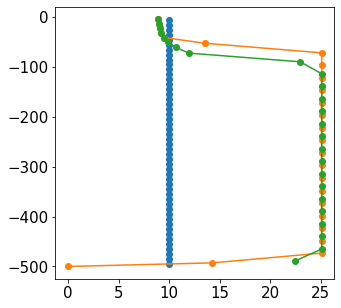

In [6]:
%matplotlib inline
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

eta_z = IC_Z.eta[0,:,0,:].values
eta_h = IC_H.eta[0,:,0,:].values

z_z = 0.5 * (eta_z[0:-1,:]+eta_z[1::,:])
z_h = 0.5 * (eta_h[0:-1,:]+eta_h[1::,:])

h_z = IC_Z.h[0,:,0,:].values 
h_h = IC_H.h[0,:,0,:].values 

ax.plot(h_z[:,0],z_z[:,0], '-o')
#ax.plot(h_z[:,1],z_z[:,1], '-o')
ax.plot(h_h[:,0],z_h[:,0], '-o')
ax.plot(h_h[:,1],z_h[:,1], '-o')


#plt.savefig('initial_conditions.png',bbox_inches='tight')

In [7]:
z = 0.5 * (eta[0:-1,:]+eta[1::,:]) 

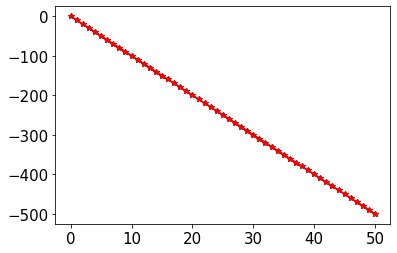

In [8]:
plt.plot(eta[:,0],'k*-')
plt.plot(eta[:,1],'r*-')

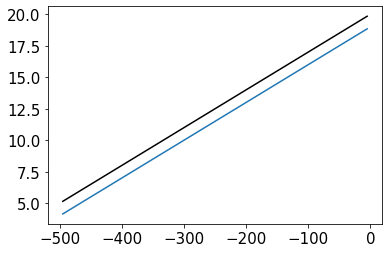

In [9]:
plt.plot(z[:,0],temp[:,0],'k')
plt.plot(z[:,1],temp[:,1])

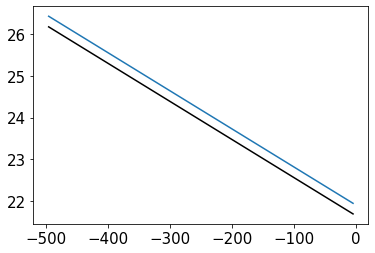

In [10]:
plt.plot(z[:,0],rho[:,0],'k')
plt.plot(z[:,1],rho[:,1])

In [11]:
#IC_Z = xr.open_dataset(path+'case1/LBD-Z/MOM_IC.nc')
IC_H = xr.open_dataset(path+'LBD-H/MOM_IC.nc')

In [12]:
def get_rho(temp,salt):
    return -0.255*temp + 1035

In [13]:
h_l = IC_H['h'][0,:,0,0].values
h_r = IC_H['h'][0,:,0,1].values
e_l = IC_H['eta'][0,:,0,0].values
e_r = IC_H['eta'][0,:,0,1].values
s_l = IC_H['Salt'][0,:,0,0].values
s_r = IC_H['Salt'][0,:,0,1].values
t_l = IC_H['Temp'][0,:,0,0].values
t_r = IC_H['Temp'][0,:,0,1].values
r_l = get_rho(t_l, s_l)
r_r = get_rho(t_r, s_r)

print('{:>4s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}'.format('l',
        'hl','hr','el','er','sl','sr','tl','tr','rl','rr'))
fmt_str = '{:5d} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f}'
for l in range(len(h_r)):
    print(fmt_str.format(l,h_l[l],h_r[l],e_l[l],e_r[l], s_l[l], s_r[l], t_l[l], t_r[l], r_l[l], r_r[l]))
          
print(fmt_str.format(l+1,np.nan,np.nan,e_l[l+1],e_r[l+1],np.nan,np.nan,np.nan,np.nan, np.nan,np.nan))

   l         hl         hr         el         er         sl         sr         tl         tr         rl         rr
    0     8.9300     8.9300    -0.0000     0.0000    35.0089    35.0089    19.8661    18.8661  1029.9342  1030.1892
    1     8.9700     8.9700    -8.9300    -8.9300    35.0268    35.0268    19.5975    18.5975  1030.0026  1030.2576
    2     9.0500     9.0500   -17.9000   -17.9000    35.0448    35.0448    19.3272    18.3272  1030.0716  1030.3266
    3     9.1900     9.1900   -26.9500   -26.9500    35.0631    35.0631    19.0537    18.0537  1030.1413  1030.3963
    4     9.4400     9.4400   -36.1400   -36.1400    35.0817    35.0817    18.7742    17.7742  1030.2126  1030.4676
    5    13.5050     9.9000   -45.5800   -45.5800    35.1047    35.1011    18.4300    17.4841  1030.3003  1030.5416
    6    25.0980    10.6700   -59.0850   -55.4800    35.1433    35.1216    17.8510    17.1756  1030.4480  1030.6202
    7    25.0980    11.9400   -84.1830   -66.1500    35.1935    35.1442  

In [14]:
(-15./500) * -0.255 

0.00765

In [15]:
500 * 0.00765

3.8249999999999997

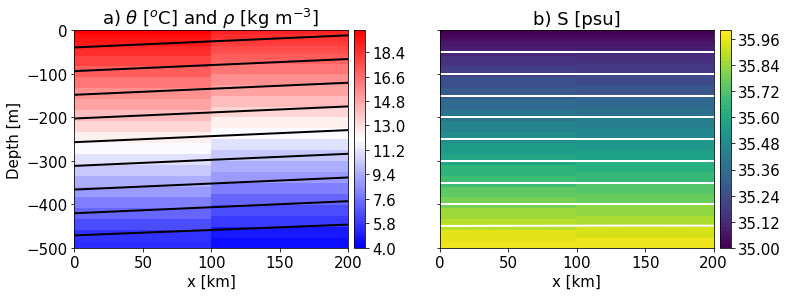

In [21]:
%matplotlib inline

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True)
temp = np.ma.masked_invalid(IC_H.Temp[0,:,0,:].values) 
salt = np.ma.masked_invalid(IC_H.Salt[0,:,0,:].values) 
rho = -0.255*temp + 0.764*salt
#tr1 = np.ma.masked_invalid(IC_H.tr1[0,:,0,:].values) 
#tr2 = np.ma.masked_invalid(IC_H.tr2[0,:,0,:].values) 
eta = IC_H.eta[0,:,0,:].values 
h = IC_H.h[0,:,0,:].values 

z1 = 0.5 * (eta[0:-1,1]+eta[1::,1]) 
z2 = 0.5 * (eta[0:-1,:]+eta[1::,:]) 

[X1,Z1] = np.meshgrid(x1,z1)
# a
yzplot(temp, grd.geolon_c[0,:], eta, nbins=100, centerlabels=True, clim=(4., 20.0), 
       show_stats=0, axis=ax[0], colormap=plt.cm.bwr)
ax[0].set_ylabel('Depth [m]') 
ax[0].set_xlabel('x [km]') 
ax[0].set_title(r'a) $\theta$ [$^o$C] and $\rho$ [kg m$^{-3}$] ')
ax[0].contour(X1,z2,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=2)

#b
yzplot(salt, grd.geolon_c[0,:], eta, nbins=50, colormap=plt.cm.viridis, centerlabels=True, 
       clim=(35., 36.), show_stats=0, axis=ax[1])
ax[1].set_ylabel('') 
ax[1].set_xlabel('x [km]') 
ax[1].set_title(r'b) S [psu]')
ax[1].contour(X1,z2,salt, levels=np.arange(35,36, 0.1), colors='w', linewidths=2)

#c
#yzplot(tr2, grd.geolon_c[0,:], eta, nbins=50, colormap=plt.cm.viridis, centerlabels=True, 
#       clim=(0., 5.), show_stats=0, axis=ax[2])
#ax[2].set_ylabel('') 
#ax[2].set_xlabel('x [km]') 
#ax[2].set_title(r'c) $\tau_1$')
#ax[2].contour(X1,z2,tr2, levels=np.arange(0,5, 0.5), colors='w', linewidths=2)

#plt.savefig('initial_conditions_hybrid.png',bbox_inches='tight')

In [22]:
z = 0.5 * (eta[0:-1,:]+eta[1::,:]) 

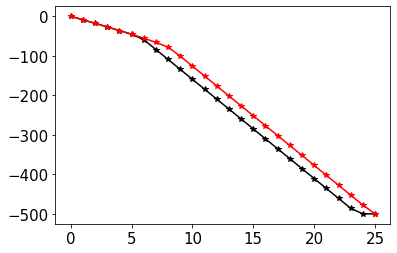

In [23]:
plt.plot(eta[:,0],'k*-')
plt.plot(eta[:,1],'r*-')

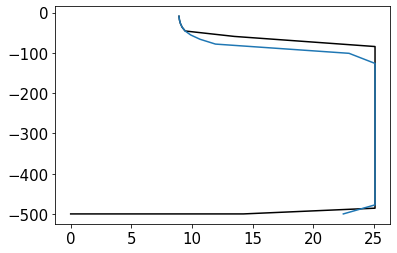

In [24]:
plt.plot(h[:,0], -h[:,0].cumsum(),'k')
plt.plot(h[:,1], -h[:,1].cumsum())

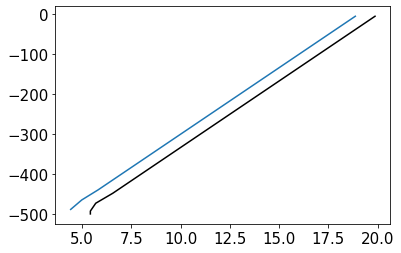

In [25]:
plt.plot(temp[:,0], z[:,0],'k')
plt.plot(temp[:,1],z[:,1])

In [26]:
def make_plot(case,grd,IC,BLD_L,BLD_R, n=0):
  %matplotlib inline  
  plt.rcParams.update({'font.size': 15})
  BLD = np.zeros(len(grd.geolon_c[0,:])+1)
  BLD[0:2]= BLD_L; BLD[2::] = BLD_R
  x_BLD = [grd.geolon_c[0,0], grd.geolon_c[0,1], grd.geolon_c[0,1], grd.geolon_c[0,2]]  
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
  ax1 = ax.flatten()
  rho = np.ma.masked_invalid(case.rhopot2[n,:,0].values) - 1000.
  lbd_tr1 = np.ma.masked_invalid(case.tr2_lbdxy_cont_tendency[n,:,0].values)
  Z = case.e[n,:,0].values 
  #Z = 0.5 * (eta[0:-1,1]+eta[1::,1])

  yzplot(lbd_tr1, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=(-1.e-7, 1.e-7), show_stats=1,
         axis=ax1[0])
  ax1[0].set_ylabel('Depth [m]') 
  ax1[0].plot(x_BLD,BLD,'k--',linewidth=4)
  #for k in range(len(case.z_i)):
  #  ax1[0].plot([x_BLD[0],x_BLD[-1]],-np.ones(2)*case.z_i[k].values,'gray',linewidth=0.5)

  ax1[0].set_title(r'a) LBD $\tau_1$')
  ax1[0].contour(x1,-z1,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)

  lbd_tr2 = np.ma.masked_invalid(case.S_lbdxy_cont_tendency[n,:,0].values)
  yzplot(lbd_tr2, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=(-1e-18, 1e-18),show_stats=1,
       title='b) LBD S', axis=ax1[1])
  ax1[1].plot(x_BLD,BLD,'k--',linewidth=4); ax1[1].set_ylabel('')
  ax1[1].set_title('b) LBD S')
  ax1[1].contour(x1,-z1,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)
               
  nd_tr1 = np.ma.masked_invalid(case.tr2_dfxy_cont_tendency[n,:,0].values)
  yzplot(nd_tr1, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=(-1e-7, 1e-7), show_stats=1,
         title=r'c) ND $\tau_1$', axis=ax1[2])
  ax1[2].set_ylabel('Depth [m]'); ax1[2].set_xlabel('Longitude [$^o$E]')
  ax1[2].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[2].set_title(r'c) ND $\tau_1$')
  ax1[2].contour(x1,-z1,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)
               
  nd_tr2 = np.ma.masked_invalid(case.S_dfxy_cont_tendency[n,:,0].values)
  yzplot(nd_tr2, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr, centerlabels=True,clim=(-1e-7, 1e-7), show_stats=1,
         axis=ax1[3])
  ax1[3].set_title('d) ND S')
  ax1[3].set_xlabel('Longitude [$^o$E]')
  ax1[3].set_ylabel('')
  ax1[3].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[3].contour(x1,-z1,rho, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)

  # plot difference
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4), sharex=True, sharey=True)
  ax1 = ax.flatten()
  
  # temp
  temp = np.ma.masked_invalid((case.temp[-1,:,0].values-IC.Temp[0,:,0,:].values))
  yzplot(temp, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr,  show_stats=1,
         axis=ax1[0])
  ax1[0].set_ylabel('Depth [m]') 
  ax1[0].set_xlabel('Longitude [$^o$E]')
  ax1[0].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[0].set_title(r'a) $\Delta \theta$ [$^o$C]',fontsize=15)

  # tr1
  tr1 = np.ma.masked_invalid((case.salt[-1,:,0].values-IC.Salt[0,:,0,:].values))
  yzplot(tr1, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr,  show_stats=1,
         axis=ax1[1])
  ax1[1].set_ylabel(''); ax1[1].set_xlabel('') 
  ax1[1].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[1].set_title(r'b) $\Delta S$ [psu]',fontsize=15)
    
  # tr2
  tr2 = np.ma.masked_invalid((case.tr2[-1,:,0].values-IC.tr2[0,:,0,:].values))
  yzplot(tr2, grd.geolon_c[0,:], Z, nbins=100, colormap=plt.cm.bwr,  show_stats=1,
         axis=ax1[2])
  ax1[2].set_ylabel(''); ax1[2].set_xlabel('') 
  ax1[2].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[2].set_title(r'c) $\Delta \tau_2$ [kg kg$^{-1}$]',fontsize=15)

  return

In [27]:
def make_plot_all(case1,case2,grd,BLD_L,BLD_R, var1='tr2_lbdxy_cont_tendency', 
                  var2='tr2_dfxy_cont_tendency', clim=(-2.3e-7, 2.3e-7), tr=r'$\theta$', 
                  fname='', units='[kg m-2 s-1]'):
  %matplotlib inline
  n = 0
  plt.rcParams.update({'font.size': 15})
  BLD = np.zeros(len(grd.geolon_c[0,:])+1)
  BLD[0:2]= BLD_L; BLD[2::] = BLD_R
  x_BLD = [grd.geolon_c[0,0], grd.geolon_c[0,1], grd.geolon_c[0,1], grd.geolon_c[0,2]]  
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), sharex=True, sharey=True)
  ax1 = ax.flatten()
  eta1 = case1.e[n,:,0,:].values 
  eta2 = case2.e[n,:,0,:].values  
  Z1 = case1.e[n,:,0].values  
  x1 = np.linspace(0,200,len(grd.xh))
  zh = 0.5 * (Z1[0:-1,1]+Z1[1::,1]) 

  [X1,Z2] = np.meshgrid(x1,zh)
    
  rho1 = np.ma.masked_invalid(case1.rhopot2[n,:,0].values) - 1000.
  nd1 = np.ma.masked_invalid(case1[var2][n,:,0].values)
  yzplot(nd1, grd.geolon_c[0,:], Z1, nbins=50, colormap=plt.cm.bwr, centerlabels=True,clim=clim, show_stats=1,
         axis=ax1[0], cbar=False)
  ax1[0].set_ylabel('Depth [m]') 
  ax1[0].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[0].set_title('a) Z* (neutral)')
  ax1[0].set_xlabel(''); ax1[1].set_ylabel('Depth [m]')
  ax1[0].contour(X1,Z2,rho1, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)

  lbd1 = np.ma.masked_invalid(case1[var1][n,:,0].values)
  yzplot(lbd1, grd.geolon_c[0,:], Z1, nbins=50, colormap=plt.cm.bwr, centerlabels=True,clim=clim,show_stats=1,
        axis=ax1[1], cbar=False)
  ax1[1].plot(x_BLD,BLD,'k--',linewidth=4); ax1[1].set_ylabel('')
  ax1[1].set_title('b) Z* (lateral)')
  ax1[1].set_xlabel(''); ax1[1].set_ylabel('')
  ax1[1].contour(X1,Z2,rho1, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)
  
  Z1 = case2.e[n,:,0].values  
  zh = 0.5 * (Z1[0:-1,1]+Z1[1::,1]) 

  [X1,Z2] = np.meshgrid(x1,zh)
  zhh = 0.5 * (eta2[0:-1,:]+eta2[1::,:])
  print(X1.shape,zhh.shape)
  rho2 = np.ma.masked_invalid(case2.rhopot2[n,:,0].values) - 1000.
  nd2 = np.ma.masked_invalid(case2[var2][n,:,0].values)
  im = yzplot(nd2, grd.geolon_c[0,:], eta2, nbins=50, colormap=plt.cm.bwr, centerlabels=True,clim=clim, show_stats=1,
         axis=ax1[2], cbar=False)
  ax1[2].set_xlabel('x [km]'); ax1[2].set_ylabel('Depth [m]')
  ax1[2].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[2].set_title('c) HYCOM1 (neutral)')
  ax1[2].contour(X1,zhh,rho2, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)

  lbd2 = np.ma.masked_invalid(case2[var1][n,:,0].values)
  im = yzplot(lbd2, grd.geolon_c[0,:], eta2, nbins=50, colormap=plt.cm.bwr, centerlabels=True, clim=clim, show_stats=1,
         axis=ax1[3], cbar=False)
  ax1[3].set_xlabel('x [km]'); ax1[3].set_ylabel('')
  ax1[3].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[3].set_title('d) HYCOM1 (lateral)')
  ax1[3].contour(X1,zhh,rho2, levels=np.arange(0,100, 0.5), colors='k', linewidths=0.5)
   
  fig.subplots_adjust(bottom=0.125)
  cbar_ax = fig.add_axes([0.17, 0.01, 0.7, 0.05])
  cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
  cbar.ax.set_title(tr+' tendency ' + units)
  if fname:
    plt.savefig(fname,bbox_inches='tight')

  return

In [28]:
 def make_profiles(case1,case2,grd,BLD_L,BLD_R, fname=''):
  %matplotlib inline
  n = 0
  plt.rcParams.update({'font.size': 15})
  BLD = np.zeros(len(grd.geolon_c[0,:])+1)
  BLD[0:2]= BLD_L; BLD[2::] = BLD_R
  x_BLD = [grd.geolon_c[0,0], grd.geolon_c[0,1], grd.geolon_c[0,1], grd.geolon_c[0,2]]  
  fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 16), sharex=False, sharey=True)
  ax1 = ax.flatten()
  eta1 = case1.e[n,:,0,:].values 
  eta2 = case2.e[n,:,0,:].values  
  Z1 = (eta1[0:-1,:] + eta1[1::,:])*0.5 
  Z2 = (eta2[0:-1,:] + eta2[1::,:])*0.5 
 
  var = 'T_lbdxy_cont_tendency' 
  lbd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)
  lbd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(lbd1))+np.max(np.abs(lbd2)))
  ax1[0].hlines(BLD_L, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[0].hlines(BLD_R, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[0].plot(lbd1[:,0], Z1[:,0], '-*',label='LBD-Z x=50 km', lw=2)
  ax1[0].plot(lbd1[:,1], Z1[:,1], '-*',label='LBD-Z x=150 km', lw=2)
  ax1[0].plot(lbd2[:,0], Z2[:,0], '-*',label='LBD-H x=50 km', lw=2)
  ax1[0].plot(lbd2[:,1], Z2[:,1], '-*',label='LBD-H x=150 km', lw=2)
  ax1[0].set_ylabel('z [m]') 
  #ax1[0].plot(x_BLD,BLD,'k--',linewidth=4)
  ax1[0].set_title(r'a) $\theta$ tendency, lateral diffusion')
  ax1[0].set_xlabel(r'$\partial_t \theta$ [{}]'.format(units))
  ax1[0].grid()
  ax1[0].set_xlim(-dummy,dummy)

  var = 'T_dfxy_cont_tendency'
  nd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)
  nd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(nd1))+np.max(np.abs(nd2)))
  ax1[1].hlines(BLD_L, -1e-10, 1e-10, colors='k', linestyles='dashed')
  ax1[1].hlines(BLD_R, -1e-10, 1e-10, colors='k', linestyles='dashed')
  ax1[1].plot(nd1[:,0], Z1[:,0],'-*', label='LBD-Z x=50 km', lw=2)
  ax1[1].plot(nd1[:,1], Z1[:,1], '-*',label='LBD-Z x=150 km', lw=2)
  ax1[1].plot(nd2[:,0], Z2[:,0], '-*',label='LBD-H x=50 km', lw=2)
  ax1[1].plot(nd2[:,1], Z2[:,1], '-*',label='LBD-H x=150 km', lw=2)
  ax1[1].set_title(r'b) $\theta$ tendency, neutral diffusion')
  ax1[1].set_xlabel(r'$\partial_t \theta$ [{}]'.format(units))
  ax1[1].grid()
  ax1[1].set_xlim(-1e-12,1e-12)


  var = 'S_lbdxy_cont_tendency'
  lbd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)
  lbd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(lbd1))+np.max(np.abs(lbd2)))
  ax1[2].hlines(BLD_L, -1e-10, 1e-10, colors='k', linestyles='dashed')
  ax1[2].hlines(BLD_R, -1e-10, 1e-10, colors='k', linestyles='dashed')
  ax1[2].plot(lbd1[:,0], Z1[:,0], '-*', label='LBD-Z x=50 km',lw=2)
  ax1[2].plot(lbd1[:,1], Z1[:,1], '-*',label='LBD-Z x=150 km',lw=2)
  ax1[2].plot(lbd2[:,0], Z2[:,0], '-*',label='LBD-H x=50 km',lw=2)
  ax1[2].plot(lbd2[:,1], Z2[:,1], '-*',label='LBD-H x=150 km',lw=2)
  ax1[2].set_ylabel('z [m]') 
  ax1[2].set_title('c) S tendency, lateral diffusion')
  ax1[2].set_xlabel(r'$\partial_t S$ [{}]'.format(units))
  ax1[2].grid()
  ax1[2].set_xlim(-1e-12,1e-12)
  ax1[2].legend(loc='upper left', ncol=1)

  var = 'S_dfxy_cont_tendency'
  nd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)
  nd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(nd1))+np.max(np.abs(nd2)))
  ax1[3].hlines(BLD_L, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[3].hlines(BLD_R, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[3].plot(nd1[:,0], Z1[:,0], '-*',lw=2)
  ax1[3].plot(nd1[:,1], Z1[:,1], '-*',lw=2)
  ax1[3].plot(nd2[:,0], Z2[:,0], '-*',lw=2)
  ax1[3].plot(nd2[:,1], Z2[:,1], '-*',lw=2)
  ax1[3].set_title('d) S tendency, neutral diffusion')
  ax1[3].set_xlabel(r'$\partial_t S$ [{}]'.format(units))
  ax1[3].grid()
  ax1[3].set_xlim(-dummy,dummy)

  var = 'tr1_lbdxy_cont_tendency'
  lbd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)
  lbd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(lbd1))+np.max(np.abs(lbd2)))
  ax1[4].hlines(BLD_L, -dummy*2, dummy*2, colors='k', linestyles='dashed')
  ax1[4].hlines(BLD_R, -dummy*2, dummy*2, colors='k', linestyles='dashed')
  ax1[4].plot(lbd1[:,0], Z1[:,0], '-*',lw=2)
  ax1[4].plot(lbd1[:,1], Z1[:,1], '-*',lw=2)
  ax1[4].plot(lbd2[:,0], Z2[:,0], '-*',lw=2)
  ax1[4].plot(lbd2[:,1], Z2[:,1], '-*',lw=2)
  ax1[4].set_ylabel('z [m]') 
  ax1[4].set_title(r'e) $\tau$ tendency, lateral diffusion')
  ax1[4].set_xlabel(r'$\partial_t \tau$ [{}]'.format(units))
  ax1[4].grid()
  ax1[4].set_xlim(-5e-6,5e-6)
  ax1[4].xaxis.get_major_formatter().set_powerlimits((0, 1))

  var = 'tr1_dfxy_cont_tendency'
  nd1 = np.ma.masked_invalid(case1[var][n,:,0,:].values)
  nd2 = np.ma.masked_invalid(case2[var][n,:,0,:].values)
  units = case1[var].units  
  dummy = np.max(np.max(np.abs(nd1))+np.max(np.abs(nd2)))
  ax1[5].hlines(BLD_L, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[5].hlines(BLD_R, -dummy, dummy, colors='k', linestyles='dashed')
  ax1[5].plot(nd1[:,0], Z1[:,0], '-*',lw=2)
  ax1[5].plot(nd1[:,1], Z1[:,1], '-*',lw=2)
  ax1[5].plot(nd2[:,0], Z2[:,0], '-*',lw=2)
  ax1[5].plot(nd2[:,1], Z2[:,1], '-*',lw=2)
  ax1[5].set_title(r'f) $\tau$ tendency, neutral diffusion')
  ax1[5].set_xlabel(r'$\partial_t \tau$ [{}]'.format(units))
  ax1[5].grid()
  ax1[5].set_xlim(-dummy,dummy)
  ax1[5].xaxis.get_major_formatter().set_powerlimits((0, 1))

  fig.tight_layout(h_pad=1)
  if fname:
    plt.savefig(fname,bbox_inches='tight')

  return

## Tracer tendencies: neutral diffusion only (CTRL) and lateral boundary + neutral diffusion (LBD)

### Experiments

HBL(left) = 100; HBL(right) = 300


| Experiment | Vertical coordinate |  BLD left (m) | BLD right (m) | LBD method | Linear transition |
|------------|:-------------------:|:-------------:|:-------------:|:----------:| :----------:      |
| LBD-z*    |          Z*         |      100      |      300      |    layer    |  true             |
| LBD-H     |          HYCOM1     |      100      |      300      |    layer    |  true            |

In [29]:
case2_lbd_z = xr.open_dataset(path+'LBD-Z/prog.nc')

In [30]:
case2_lbd_z

<xarray.Dataset>
Dimensions:                     (Time: 1, scalar_axis: 1, xh: 2, xq: 3, yh: 2, yq: 3, zi: 51, zl: 50)
Coordinates:
  * scalar_axis                 (scalar_axis) float64 0.0
  * Time                        (Time) object 0001-01-01 01:00:00
  * xh                          (xh) float64 50.0 150.0
  * yh                          (yh) float64 50.0 150.0
  * zl                          (zl) float64 5.0 15.0 25.0 ... 475.0 485.0 495.0
  * xq                          (xq) float64 0.0 100.0 200.0
  * yq                          (yq) float64 0.0 100.0 200.0
  * zi                          (zi) float64 0.0 10.0 20.0 ... 480.0 490.0 500.0
Data variables:
    thetaoga                    (Time, scalar_axis) float64 ...
    soga                        (Time, scalar_axis) float64 ...
    rhopot2                     (Time, zl, yh, xh) float64 ...
    u                           (Time, zl, yh, xq) float64 ...
    v                           (Time, zl, yq, xh) float64 ...
    h                           (Time, zl, yh, xh) float64 ...
    e                           (Time, zi, yh, xh) float64 ...
    temp                        (Time, zl, yh, xh) float64 ...
    salt                        (Time, zl, yh, xh) float64 ...
    KHTR_h                      (Time, yh, xh) float64 ...
    KHTR_u                      (Time, yh, xq) float64 ...
    KHTR_v                      (Time, yq, xh) float64 ...
    KHDT_x                      (Time, yh, xq) float64 ...
    KHDT_y                      (Time, yq, xh) float64 ...
    tr1                         (Time, zl, yh, xh) float64 ...
    T_dfxy_cont_tendency        (Time, zl, yh, xh) float64 ...
    S_dfxy_cont_tendency        (Time, zl, yh, xh) float64 ...
    T_lbdxy_cont_tendency       (Time, zl, yh, xh) float64 ...
    S_lbdxy_cont_tendency       (Time, zl, yh, xh) float64 ...
    T_lbdxy_cont_tendency_2d    (Time, yh, xh) float64 ...
    S_lbdxy_cont_tendency_2d    (Time, yh, xh) float64 ...
    tr1_lbdxy_cont_tendency_2d  (Time, yh, xh) float64 ...
    tr1_dfxy_cont_tendency      (Time, zl, yh, xh) float64 ...
    tr1_lbdxy_cont_tendency     (Time, zl, yh, xh) float64 ...
    tr1_tendency_vert_remap     (Time, zl, yh, xh) float64 ...
Attributes:
    filename:          prog.nc
    title:             LBD idealized experiment
    associated_files:  area_t: static.nc
    grid_type:         regular
    grid_tile:         N/A

In [31]:
h_l = case2_lbd_z['h'][0,:,0,0].values
h_r = case2_lbd_z['h'][0,:,0,1].values
e_l = case2_lbd_z['e'][0,:,0,0].values
e_r = case2_lbd_z['e'][0,:,0,1].values
s_l = case2_lbd_z['T_lbdxy_cont_tendency'][0,:,0,0].values
s_r = case2_lbd_z['T_lbdxy_cont_tendency'][0,:,0,1].values

print('{:>4s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}'.format('l','hl','hr','el','er','sl','sr'))
fmt_str = '{:5d} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f}'
for l in range(len(h_r)):
    print(fmt_str.format(l,h_l[l],h_r[l],e_l[l],e_r[l], s_l[l], s_r[l]))
          
print(fmt_str.format(l+1,np.nan,np.nan,e_l[l+1],e_r[l+1],np.nan,np.nan))

   l         hl         hr         el         er         sl         sr
    0    10.0000    10.0000     0.0000     0.0000    -4.1318     4.1318
    1    10.0000    10.0000   -10.0000   -10.0000    -4.1318     4.1318
    2    10.0000    10.0000   -20.0000   -20.0000    -4.1318     4.1318
    3    10.0000    10.0000   -30.0000   -30.0000    -4.1318     4.1318
    4    10.0000    10.0000   -40.0000   -40.0000    -4.1318     4.1318
    5    10.0000    10.0000   -50.0000   -50.0000    -4.1318     4.1318
    6    10.0000    10.0000   -60.0000   -60.0000    -4.1318     4.1318
    7    10.0000    10.0000   -70.0000   -70.0000    -4.1318     4.1318
    8    10.0000    10.0000   -80.0000   -80.0000    -4.1318     4.1318
    9    10.0000    10.0000   -90.0000   -90.0000    -4.1318     4.1318
   10    10.0000    10.0000  -100.0000  -100.0000    -4.0285     4.0285
   11    10.0000    10.0000  -110.0000  -110.0000    -3.8219     3.8219
   12    10.0000    10.0000  -120.0000  -120.0000    -3.6153     

In [32]:
#make_plot(case2_lbd_z,grd,IC_Z,BLD_L=-100,BLD_R=-300)

In [33]:
case2_lbd_h = xr.open_dataset(path+'LBD-H/prog.nc')

In [34]:
h_l = case2_lbd_h['h'][0,:,0,0].values
h_r = case2_lbd_h['h'][0,:,0,1].values
e_l = case2_lbd_h['e'][0,:,0,0].values
e_r = case2_lbd_h['e'][0,:,0,1].values
s_l = case2_lbd_h['S_lbdxy_cont_tendency'][0,:,0,0].values
s_r = case2_lbd_h['S_lbdxy_cont_tendency'][0,:,0,1].values

print('{:>4s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}'.format('l','hl','hr','el','er','sl','sr'))
fmt_str = '{:5d} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:14.14f} {:14.14f}'
for l in range(len(h_r)):
    print(fmt_str.format(l,h_l[l],h_r[l],e_l[l],e_r[l], s_l[l], s_r[l]))
          
print(fmt_str.format(l+1,np.nan,np.nan,e_l[l+1],e_r[l+1],np.nan,np.nan))

   l         hl         hr         el         er         sl         sr
    0     8.9300     8.9300    -0.0000    -0.0000 0.00000000000000 0.00000000000000
    1     8.9700     8.9700    -8.9300    -8.9300 0.00000000000000 0.00000000000000
    2     9.0500     9.0500   -17.9000   -17.9000 0.00000000000000 0.00000000000000
    3     9.1900     9.1900   -26.9500   -26.9500 0.00000000000000 0.00000000000000
    4     9.4400     9.4400   -36.1400   -36.1400 0.00000000000000 0.00000000000000
    5    13.5050     9.9000   -45.5800   -45.5800 0.00000000000000 -0.00000000000000
    6    25.0980    10.6700   -59.0850   -55.4800 0.00000000000000 -0.00000000000000
    7    25.0980    11.9400   -84.1830   -66.1500 0.00000000000000 -0.00000000000000
    8    25.0980    22.9558  -109.2810   -78.0900 0.00000000000000 -0.00000000000000
    9    25.0980    25.0980  -134.3791  -101.0458 -0.00000000000000 0.00000000000000
   10    25.0980    25.0980  -159.4771  -126.1438 0.00000000000000 -0.00000000000000

In [35]:
#make_plot(case2_lbd_h,grd,IC_H,BLD_L=-100,BLD_R=-300)

In [38]:
# tracer2
#make_plot_all(case2_lbd_z,case2_lbd_h, grd,BLD_L=-100,BLD_R=-300, tr=r'$\tau_1$',
#              clim=(-2e-8, 2e-8), fname='case2_tr2', units='[kg kg-1 m s-1]')

In [39]:
#make_plot_all(case2_lbd_z,case2_lbd_h, grd,BLD_L=-100,BLD_R=-300, clim=(-5e-8, 5e-8), tr='S',
#              var1='S_lbdxy_cont_tendency',var2='S_dfxy_cont_tendency', fname='case2_salt')

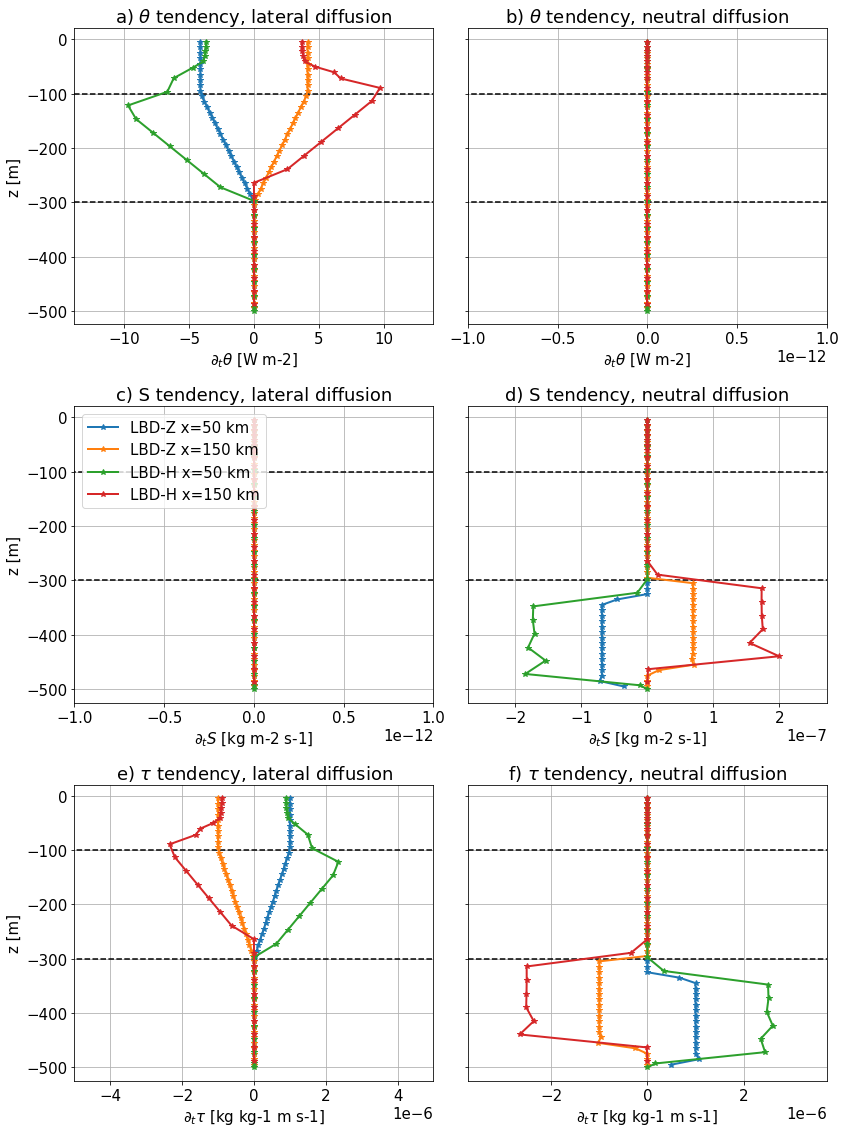

In [40]:
make_profiles(case2_lbd_z,case2_lbd_h,grd,BLD_L=-100,BLD_R=-300, fname='tendency_profiles')

In [41]:
h_l = case2_lbd_h['h'][0,:,0,0].values
h_r = case2_lbd_h['h'][0,:,0,1].values
e_l = case2_lbd_h['e'][0,:,0,0].values
e_r = case2_lbd_h['e'][0,:,0,1].values
s_l = case2_lbd_h['T_lbdxy_cont_tendency'][0,:,0,0].values
s_r = case2_lbd_h['T_lbdxy_cont_tendency'][0,:,0,1].values

print('{:>4s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}'.format('l','hl','hr','el','er','sl','sr'))
fmt_str = '{:5d} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:12.12f} {:12.12f}'
for l in range(len(h_r)):
    print(fmt_str.format(l,h_l[l],h_r[l],e_l[l],e_r[l], s_l[l], s_r[l]))
          
print(fmt_str.format(l+1,np.nan,np.nan,e_l[l+1],e_r[l+1],np.nan,np.nan))

   l         hl         hr         el         er         sl         sr
    0     8.9300     8.9300    -0.0000    -0.0000 -3.689721364648 3.689721364648
    1     8.9700     8.9700    -8.9300    -8.9300 -3.706248671992 3.706248671992
    2     9.0500     9.0500   -17.9000   -17.9000 -3.739303286681 3.739303286681
    3     9.1900     9.1900   -26.9500   -26.9500 -3.797148862387 3.797148862387
    4     9.4400     9.4400   -36.1400   -36.1400 -3.900444533290 3.900444533290
    5    13.5050     9.9000   -45.5800   -45.5800 -4.720552160825 4.720552160825
    6    25.0980    10.6700   -59.0850   -55.4800 -6.187015267564 6.187015267564
    7    25.0980    11.9400   -84.1830   -66.1500 -6.686028764198 6.686028764198
    8    25.0980    22.9558  -109.2810   -78.0900 -9.714180952515 9.714180952515
    9    25.0980    25.0980  -134.3791  -101.0458 -9.089949789028 9.089949789028
   10    25.0980    25.0980  -159.4771  -126.1438 -7.788607352799 7.788607352799
   11    25.0980    25.0980  -184.5752

In [42]:
h_l = case2_lbd_h['h'][0,:,0,0].values
h_r = case2_lbd_h['h'][0,:,0,1].values
e_l = case2_lbd_h['e'][0,:,0,0].values
e_r = case2_lbd_h['e'][0,:,0,1].values
s_l = case2_lbd_h['S_dfxy_cont_tendency'][0,:,0,0].values
s_r = case2_lbd_h['S_dfxy_cont_tendency'][0,:,0,1].values
depth_l = 0.5* (e_l[0:-1] + e_l[1::])
depth_r = 0.5* (e_r[0:-1] + e_r[1::])

print('{:>4s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s} {:>10s}'.format('l','hl','hr','depth_l','depth_r','el','er','sl','sr'))
fmt_str = '{:5d} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:10.4f} {:14.14f} {:14.14f}'
for l in range(len(h_r)):
    print(fmt_str.format(l,h_l[l],h_r[l],depth_l[l], depth_r[l], e_l[l],e_r[l], s_l[l], s_r[l]))
          
print(fmt_str.format(l+1,np.nan,np.nan,np.nan,np.nan, e_l[l+1],e_r[l+1],np.nan,np.nan))

   l         hl         hr    depth_l    depth_r         el         er         sl         sr
    0     8.9300     8.9300    -4.4650    -4.4650    -0.0000    -0.0000 0.00000000000000 0.00000000000000
    1     8.9700     8.9700   -13.4150   -13.4150    -8.9300    -8.9300 0.00000000000000 0.00000000000000
    2     9.0500     9.0500   -22.4250   -22.4250   -17.9000   -17.9000 0.00000000000000 0.00000000000000
    3     9.1900     9.1900   -31.5450   -31.5450   -26.9500   -26.9500 0.00000000000000 0.00000000000000
    4     9.4400     9.4400   -40.8600   -40.8600   -36.1400   -36.1400 0.00000000000000 0.00000000000000
    5    13.5050     9.9000   -52.3325   -50.5300   -45.5800   -45.5800 0.00000000000000 0.00000000000000
    6    25.0980    10.6700   -71.6340   -60.8150   -59.0850   -55.4800 0.00000000000000 0.00000000000000
    7    25.0980    11.9400   -96.7320   -72.1200   -84.1830   -66.1500 0.00000000000000 0.00000000000000
    8    25.0980    22.9558  -121.8301   -89.5679  -109.281